# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Joniar Fani Widodo
- Email: jfanniw@gmail.com
- Id Dicoding: weedodo

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dalam 2 tahun terakhir?
- Bagaimana tren peminjaman sepeda dalam 2 tahun terakhir antara pengguna casual dan registered?
- Bagaimana peminjaman sepeda setiap musimnya?
- Bagaimana peminjaman sepeda berdasarkan kondisi cuaca?
- Bagaimana peminjaman sepeda berdasarkan hari kerja?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Me-mount google drive karena dataset disimpan dalam g-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Membaca bike sharing dataset
bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Belajar Analisis Data Dengan Python/Bike-sharing-dataset/hour.csv')

# Menampilkan sebagian baris dataset untuk mendapatkan gambaran data
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Melihat karakteristik data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Melakukan pemeriksaan adanya missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari informasi diatas dapat disimpulkan bahwa tidak ditemukan *missing values*

In [6]:
# Cek duplikasi data
bike_data.duplicated().sum()

0

Dari informasi diatas dapat disimpulkan bahwa tidak ditemukan **data duplikat**

### Cleaning Data
Karena tidak ditemukan data yg bermasalah, maka proses pembersihan data tidak dilakukan.

In [7]:
# Tidak dilakukan

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# Melihat statistik dalam data
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

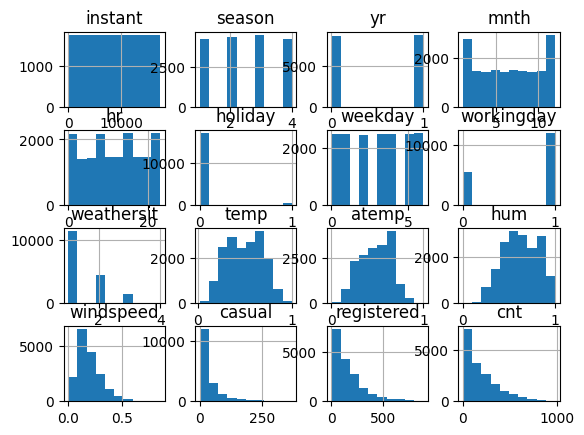

In [9]:
# Memeriksa distribusi data secara cepat
bike_data.hist()

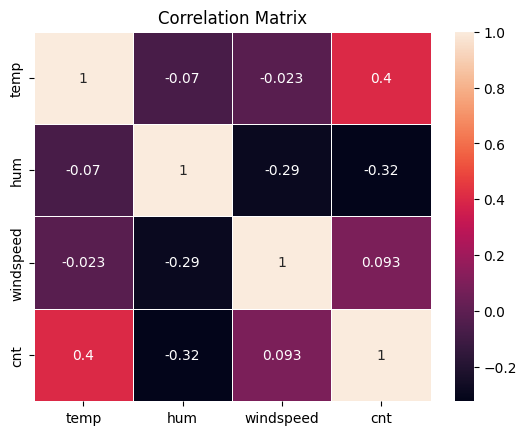

In [10]:
# Memeriksa korelasi data numerik
correlation_matrix = bike_data[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan nilai korelasi tersebut, kita dapat menyimpulkan pasangan variabel di atas tidak memiliki korelasi karena nilainya mendekati nol (max: 0.4).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

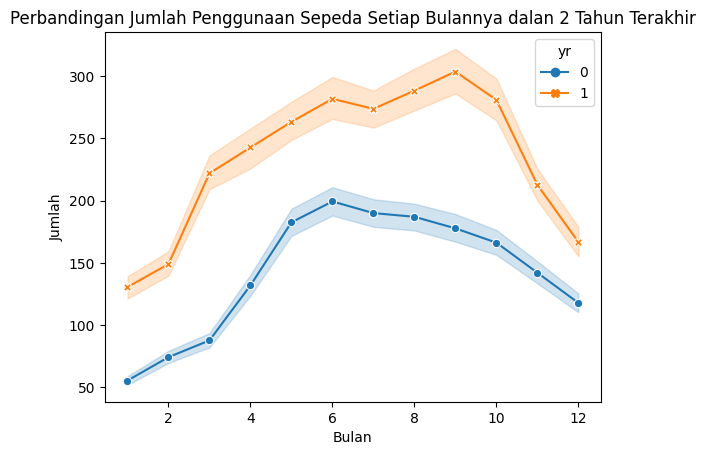

In [11]:
# Gambarkan perbandingan jumlah pemakaian sepeda setiap bulannya dalam 2 tahun terakhir
plt.figure()
sns.lineplot(data=bike_data, x='mnth', y='cnt', hue='yr', style='yr', markers=True, dashes=False)
plt.title('Perbandingan Jumlah Penggunaan Sepeda Setiap Bulannya dalan 2 Tahun Terakhir')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 2:

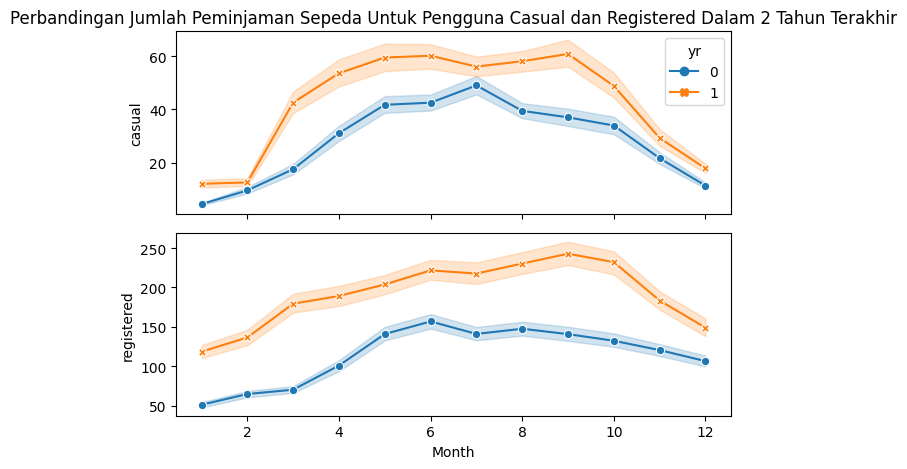

In [12]:
# Gambarkan perbandingan jumlah pemakaian sepeda setiap bulannya dalam 2 tahun terakhir antara pengguna casual dan registered
f, axs = plt.subplots(2, 1)
g1 = sns.lineplot(data=bike_data, x='mnth', y='casual', hue='yr', style='yr', markers=True, dashes=False, ax=axs[0])
g1.set(title='Perbandingan Jumlah Peminjaman Sepeda Untuk Pengguna Casual dan Registered Dalam 2 Tahun Terakhir')
g1.set(xticklabels=[])
g1.set(xlabel=None)

g2 = sns.lineplot(data=bike_data, x='mnth', y='registered', hue='yr', style='yr', markers=True, dashes=False, ax=axs[1], legend=False)
g2.set(xlabel="Month")
f.tight_layout()

### Pertanyaan 3:

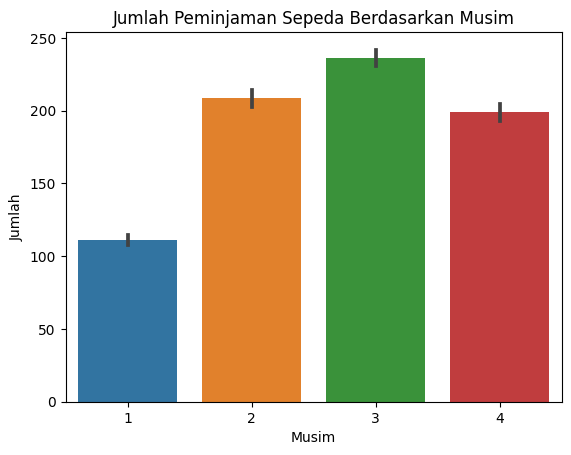

In [13]:
# Mengetahui Jumlah Peminjaman Sepeda Berdasarkan Musim
sns.barplot(data=bike_data, x='season', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.show()
# 1:springer, 2:summer, 3:fall, 4:winter

### Pertanyaan 4:

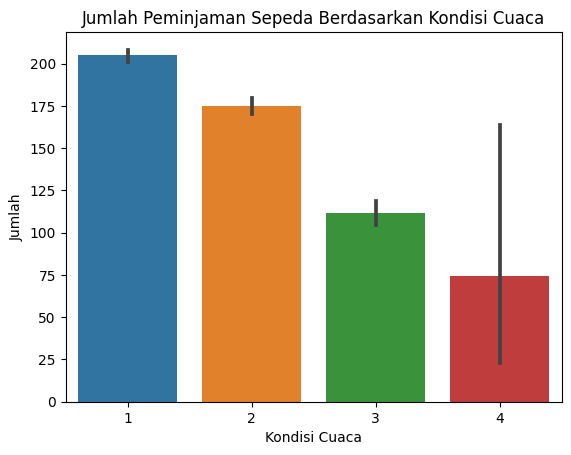

In [14]:
# Mengetahui Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca
sns.barplot(data=bike_data, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah')
plt.show()
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Pertanyaan 5:

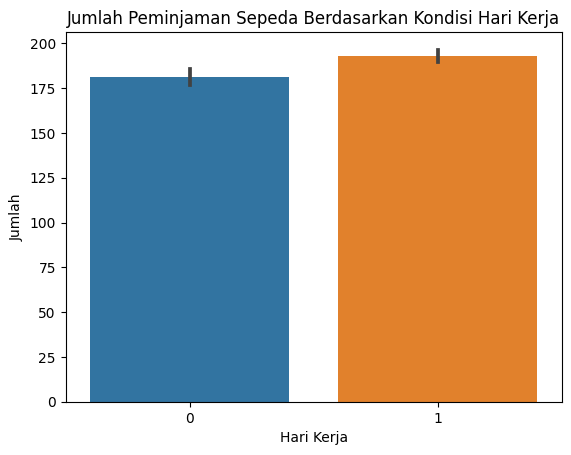

In [15]:
# Mengetahui Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja
sns.barplot(data=bike_data, x='workingday', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Kondisi Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah')
plt.show()
#1: hari libur, 0: hari kerja.

## Conclusion

- Kesimpulan pertanyaan 1
Berdasarkan pada visualisasi grafik yg dibuat dapat terlihat terjadinya peningkatan jumlah peminjaman sepeda dalam 2 tahun terakhir.

- Kesimpulan pertanyaan 2
Berdasarkan pada visualisasi grafik yg dibuat dapat terlihat bahwasanya penggunaan sepeda untuk pengguna registered (terdaftar) lebih tinggi daripada pengguna casual (lepas).

- Kesimpulan pertanyaan 3
Berdasarkan pada visualisasi grafik yg dibuat dapat disimpulkan bahsawanya peminjaman sepeda tertinggi terjadi pada musim gugur (fall), diikuti kemudian dengan musim panas (summer), musim dingin (winter) dan terakhir springer (spring)

- Kesimpulan pertanyaan 4
Berdasarkan pada visualisasi grafik yg dibuat dapat disimpulkan bahsawanya peminjaman sepeda tertinggi terjadi pada cuaca cerah, selanjutnya berturut-turut diikuti cuaca berkabut, hujan ringan dan terakhir saat cuaca hujan deras.

- Kesimpulan pertanyaan 5
Berdasarkan pada visualisasi grafik yg dibuat dapat disimpulkan bahsawanya perbedaan peminjaman sepeda antara hari kerja dan hari biasa tidak terlalu signifikan. Namun pemijaman lebih banyak terjadi saat kondisi hari libur.